# Chapter 3

## 1. 단어 표현 (Word Representation)

: 텍스트를 언어적인 특성을 반영해서 단어를 수치화하는 방법 ==> 단어를 주로 **벡터**로 표기

*one-hot encoding : 각 값은 0 또는 1 => 알 수 있는 벡터 값 중 하나만 1이 되고 나머지는 0 => 문제점이 많다*

#### 분포가설(Distributed Hypothesis) : 같은 문맥의 단어, 비슷한 위치에 나오는 단어는 비슷한 의미를 가진다.

- **카운트 기반(count-base)** : 특정 문맥 안에서 단어들이 동시에 등장하는 횟수를 셈
    - 특이값 분해(Singular Value Decomposition, SVD)
    - 잠재의미분석(Latent Semantic Analysis, LSA)
    - Hyperspace Analogue to Language(HAL)
    - Helinger PCA(Principal Component Analysis)  
*=> 모두 동시에 출현행렬(Co-occurence Matrix)를 만들고, 변형하는 방식, 빠르다는 장점이 있다.*<br><br>
- **예측(Predictive) 방법** : 신경망 구조 혹은 어떠한 모델을 통해 문맥 안의 단어들을 예측하면서 단어를 벡터로 만드는 방식
    - Word2vec : 가장 많이 사용 (두 가지 방법을 모두 포함하는 Glove)
        - CBOW(Continuous Bag of Words) : 어떤 단어를 문맥 안의 주변 단어들을 통해 예측하는 방법
                1. 각 주변 단어들을 one-hot vector로 만들어 입력값으로 사용한다.(입력층 벡터)
                2. 가중치 행렬(weight matrix)을 각 one-hot vector에 곱해서 n-dimension vector를 만든다(n-차원 은닉층)
                3. 만들어진 n-차원 벡터를 모두 더한 후, 개수로 나눠 평균 n-dimension vector를 만든다.(출력층 벡터)
                4. n-dimension vector에 다시 weight matrix를 곱해서 one-hot vector와 같은 차원의 벡터로 만든다.
                5. 만들어진 벡터를 실제 예측하려고 하는 단어의 one-hot vector와 비교해서 학습한다.
                => 입력값으로 쓰이는 단어가 여러 개, 학습을 위해 하나의 단어와만 비교
        - Skip-Gram : 어떤 단어를 가지고 특정 문맥안의 주변 단어들을 예측하는 방법
                1. 하나의 단어를 one-hot vector로 만들어서 입력값으로 사용한다.(입력층 벡터)
                2. 가중치 행렬을 one-hot vector에 곱해서 n-dimension vector를 만든다.(n-차원 은닉층)
                3. n-dimension vector에서 다시 가중치 행렬을 곱해서 one-hot vector와 같은 차원의 벡터로 만든다.(출력층 벡터)
                4. 만들어진 벡터를 실제 예측하려는 주변 단어들 각각의 one-hot vector와 비교해서 학습한다.
                => 입력값은 하나의 단어, 학습을 위해 주변의 여러 단어와 비교한다.
                
      => 학습 과정을 모두 끝낸 후, 가중치 행렬의 각 행을 단어 벡터로 사용한다.<br><br>
      <장점>
        - count-base보다 단어 간의 유사도를 잘 측정한다
        - 단어들의 복잡한 특징까지도 잘 잡아낸다
        - 이렇게 만들어진 벡터는 서로에게 유의미한 관계를 측정할 수 있다.(cosine distance 측정)
    - NNLM(Neural Network Language Model)
    - RNNLM(Recurrent Neural Network Language Model)

![cbow_skipgram](http://solarisailab.com/wp-content/uploads/2017/05/cbow_and_skip-gram_diff.png)

## 2. 텍스트 분류(Text Classification)

: 범주(Class)중 어느 범주에 속하는지 분류

- 2가지 범주 => 이진 분류(Binary Classification)
- 3가지 이상 => 다중 범주 분류(Multi class classfication)

텍스트 분류의 예시
- 스팸 분류
- 감정 분류
- 뉴스 기사 분류

**<지도학습을 통한 텍스트 분류>**  
: 글(data)에 대해 각각 속한 class에 대한 값(label)이 이미 주어져 있음 => 주어진 class로 글들을 모두 학습한 후, 학습한 결과를 이용해 새로운 글의 범주를 예측하는 방법
- 나이브 베이즈 분류(Naive Bayes Classifier)
- 서포트 벡터 머신(Support Vector Machine)
- 신경망(Neural Network)
- 선형 분류(Linear Classifier)
- 로지스틱 분류(Logistic Classifier)
- 랜덤 포레스트(Random Forest)

**<비지도학습을 통한 텍스트 분류>**  
: 데이터만 있고, 각 데이터는 class로 나눠져 있지 않다 => 특성을 찾아내서 적당한 class를 만들어 각 데이터를 나눈다.
- K-means Clustering
- 계층적 군집화(Hierarchical Clustering)

## 3. 텍스트 유사도(Text Similarity)

유사도를 판단하는 척도는 매우 주관적이기 때문에 데이터를 구성하기가 쉽지 않고 정량화하는 데 한계가 있다. => 최대한 정량화해서 모델을 만드는 것이 중요  
<br>유사도 판단을 위한 정량화 방법
- 단순히 같은 단어의 개수를 사용해서 유사도 판단
- 형태소로 나누어 형태소를 비교하는 방법
- 자소 단위로 나누어 단어를 비교하는 방법 등

=> 딥러닝을 기반으로 텍스트의 유사도 측정 : 단어, 형태소, 유사도의 종류에 상관 없이, 텍스트를 벡터화한 후, 벡터화된 각 문장 간의 유사도 측정

**<유사도 측정 방법>**
- 자카드 유사도
- 유클리디언 유사도
- 맨하탄 유사도
- 코사인 유사도

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.",
       "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습닠다.")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) #문장 벡터화

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf))) #각 수치에 대한 값 시각화

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.4054651081081644, '있습닠다': 1.4054651081081644, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


### <유사도 측정 방법>

#### - 자카드 유사도(Jacard Similarity)  
: 두 문장을 각각 단어의 집합으로 만든 뒤 두 집합을 통해 유사도를 측정하는 방식 중 하나  
유사도 측정 방법 : $J(A,B)=\frac{|A\cap B|}{|A \cup B|}=\frac{|token\,in\,A\,\cap\,token\,in\,B|}{|token\,in\,A\,\cup \,token\,in\,B|}$ (A와 B는 각 문장, token은 각 단어)  
0~1 사이의 값 => 1에 가까울 수록, 유사도가 높음

#### - 코사인 유사도  
: 두 개의 벡터값에서 코사인 각도를 구하는 방법  
코사인 유사도 : -1 ~ 1사이의 값, 1에 가까울수록 유사하다는 의미  
다른 유사도 접근법에 비해 성능이 좋음 => 두 벡터간의 각도를 구하는 것이므로, 방향성의 개념이 더해진다.  
두 문장이 유사하면 같은 방향으로 가리킬 것이고, 유사하지 않으면 직교로 표현될 것  
코사인 유사도 공식 : $cos(\theta)=\frac{\vec{a}\cdot\vec{b}}{||\vec{a}||\cdot||\vec{b}||}$  


In [3]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2]) # 첫 번째와 두 번째 문장 비교
# 문장 A와 B의 유사도는 0.113

array([[0.11304078]])

#### - 유클리디언 유사도(Euclidean)  
: 가장 기본적인 거리를 측정하는 유사도 공식  
Euclidean Distance, L2 Distance : $d(x,y)=\sqrt{{(x_1-y_1)}^2+{(x_2-y_2)}^2+\dots+{(x_n+y_n)}^2}$  

In [5]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.33188529]])

유클리디언 유사도는 단순히 두 점 사이의 거리를 뜻하기 때문에 값에 제한이 없다. => 따라서 값을 제한해야 한다.(0~1 사이의 값을 갖도록)  
==> Normalize 후, Euclidean 측정 -> 여기서는 L1-Normalization사용

In [7]:
import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    return v/norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.21243357]])

#### - 맨하탄 유사도(Manhattan Similarity)  
Manhattan Distance : 사각형 격자로 이뤄진 지도에서 출발점에서 도착점까지를 가로지르지 않고 갈 수 있는 최단거리를 구하는 공식  
$MaDistance = \sum_{i=1}^{n}|a_i-b_i|$
![image](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/400px-Manhattan_distance.svg.png)  
L2 Norm, Euclidean Distance => 초록색 선  
L1 Norm, Manhattan Distance => 빨강, 노랑, 파랑색 선  
유클리디언과 같이 값이 매우 커질 수 있으므로, L1 정규화를 사용한다.

In [8]:
from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.85654185]])

## 4. 자연어 생성

## 5. 기계 이해(Machine Comprehension)

: 기계가 어떤 텍스트에 대한 정보를 학습하고 사용자가 질의를 던졌을 때 그에 대해 응답하는 문제, 기계가 텍스트를 이해하고 논리적 추론을 할 수 있는지 데이터 학습을 통해 보는 것  
- 데이터셋
- bAbI
- SQuAD(Stanford Question Answering Dataset)
    - EM(Exact Matching) : 정답 위치와 완벽하게 일치하는지
    - F1 Score : 정답 위치와 겹치는지
- Visual Question Answering(VQA) : 이미지에 대한 정보와 텍스트 질의를 통해 이미지 컨텍스트에 해당하는 응답을 알려줌

## 6. 데이터 이해하기

탐색적 데이터 분석(EDA; Exploratory Data Analysis) 과정
- 생각하지 못한 데이터의 여러 패턴이나 잠재적인 문제점 등을 발견할 수 있다.  
- 데이터를 먼저 이해해야함
- 데이터에 대한 최대한 많은 정보를 뽑아내야 한다. : 평균값, 중앙값, 최솟값, 최댓값, 범위, 분포, 이상치(Outlier)
- 분석가의 선입견을 철저히 배제해야한다.

In [9]:
#간단한 실습

# 데이터 이름 : aclImdb_v1
# 데이터 용도 : 탐색적 데이터 분석에 대해 알아보기 위한 목적
# 데이터 권한 : MIT
# 데이터 출처 : http://ai.stanford.edu/~amaas/data/sentiment


import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

# keras module의 get_file함수를 통해 IMDB 데이터를 가져온다.
data_set = tf.keras.utils.get_file(
        fname="imdb.tar.gz",
        origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
        extract=True)

84131840/84125825 [==============================] - 18s 0us/step


In [10]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r") as file:
            data["review"].append(file.read())
    return pd.DataFrame.from_dict(data)

In [11]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    return pd.concat([pos_df, neg_df])

In [12]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [13]:
train_df.head()

,review,sentiment
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


In [15]:
reviews = list(train_df['review'])

In [16]:
#문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]

#토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

#토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

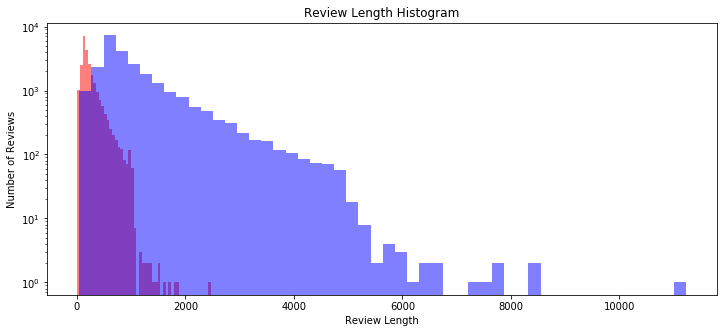

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

"""
Histogram
bins : 히스토그램 값에 대한 버킷 범위
alpha : 그래프 색상 투명도
color : 그래프 색상
label : 그래프에 대한 라벨
"""

plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word') #단어개수
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet') #알파벳 개수
plt.yscale('log', nonposy='clip')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

In [20]:
import numpy as np

print('문장 최대 길이 : {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_token)))

print('제1사분위 길이 : {}'.format(np.percentile(review_len_by_token, 25)))
print('제3사분위 길이 : {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대 길이 : 2470
문장 최소 길이 : 10
문장 평균 길이 : 233.79
문장 길이 표준편차 : 173.73
제1사분위 길이 : 127.0
제3사분위 길이 : 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x14adc1710>,
 'caps': [<matplotlib.lines.Line2D at 0x14adc1da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14adc1400>],
 'medians': [<matplotlib.lines.Line2D at 0x14add0470>],
 'fliers': [<matplotlib.lines.Line2D at 0x14add0ac8>],
 'means': [<matplotlib.lines.Line2D at 0x14add07b8>]}

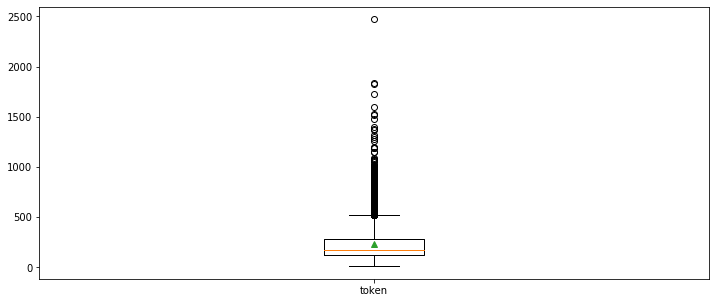

In [21]:
# 단어 수
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x14af4ce10>,
 'caps': [<matplotlib.lines.Line2D at 0x14b03d4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14af4cac8>],
 'medians': [<matplotlib.lines.Line2D at 0x14b03db70>],
 'fliers': [<matplotlib.lines.Line2D at 0x14b0471d0>],
 'means': [<matplotlib.lines.Line2D at 0x14b03deb8>]}

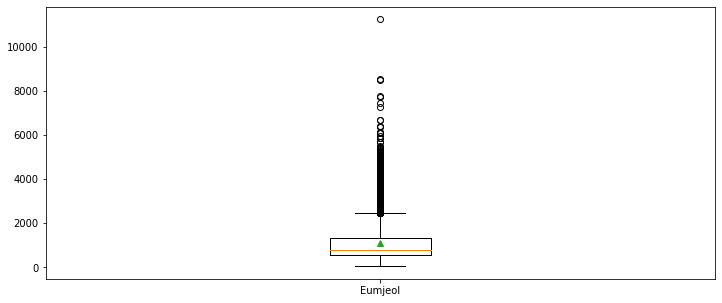

In [22]:
# 알파벳 개수
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_eumjeol], labels=['Eumjeol'], showmeans=True)

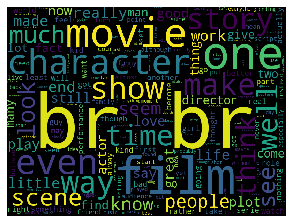

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width=800, height=600).generate(' '.join(train_df['review']))

plt.figure(figsize=(5,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

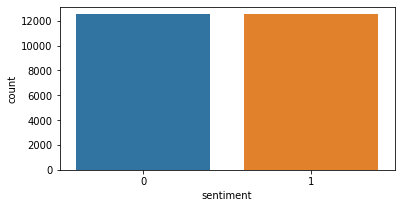

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])